# Laboratorio de regresión lineal

|                |   |
:----------------|---|
| **Nombre**     |Santiago Padilla Arias|   |
| **Fecha**       |  23/09/2024|   |
| **Expediente** | 750985  |   |

La regresión lineal es una heramienta útil para predecir una respuesta cuantitativa. A pesar de que existen soluciones más modernas, la regresión lineal se sigue usando, pues sirve como un punto de partida para comparar otras herramientas.

Se debe comprender cómo funciona la regresión antes de empezar a estudiar métodos de aprendizaje estadístico más complejos.

1. Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [17]:
import pandas as pd
datos=pd.read_csv("Advertising.csv")
datos

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


![](T05_Advertising.png)
![](T05_Advertising2.png)
![](T05_Advertising3.png)

**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

A simple vista no es posible percatarse de una relación entre el presupuesto de estas dos áreas, pues algunos dias hay buena publicidad y buenas ventas, pero en ocasiones hay buena publicidad pero no buenas ventas y viceversa.

Se podría optar por dejar de invertir ese dinero, porque no estaría generando beneficios solo ocasionaría pérdidas.

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

Suele ser muy estrecha esa relación, claro que no sirve porque nos dice como enfocar la publicidad con el objetivo de mejorar las ventas

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

## Regresión lineal simple

Un método sencillo para predecir una variable cuantitativa $Y$ dado un solo predictor $X$. Podemos escribir esta relación como:

$$ Y \approx \beta_0 + \beta_1 X$$

Por ejemplo, si decimos que $X$ se refiere a lo gastado en publicidad de TV y que $Y$ son las ventas, podemos buscar:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

A $\beta_0$ y $\beta_1$ se le conoce como los coeficientes o parámetros del modelo. Una vez que usamos los datos históricos para producir estimados $\hat{\beta_0}$ y $\hat{\beta_1}$, podemos predecir ventar futuras basándonos en lo gastado en publicidad en TV usando
$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $$

donde $\hat{y}$ indica una predicción de $Y$ basado en $X = x$. (El símbolo $\hat{ }$ se usa para hacer notar que es sólo una estimación de un parámetro desconocido)

### Estimando coeficientes

$\beta_0$ y $\beta_1$ son desconocidos. Se deben estimar usando los datos antes de poder predecir. 

$ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) $ representa $n$ observaciones, cada una con datos medidos para $X$ y $Y$.

El archivo de publicidad contiene observaciones de 200 mercados y presupuestos usados para publicidad en 3 medios. Nuestra meta actual es encontrar $\hat{\beta_0}$ y $\hat{\beta_1}$ tal que exista un modelo lineal que se ajuste bien a los datos ($y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$  para $ i=1,...,n$).

Hay muchas formas de medir el ajuste de una curva; la más común es usar el criterio de los mínimos cuadrados. Si $y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$ es una predicción de $Y$ basada en el valor número $i$ de $X$, entonces definimos el error/residuo como $e_i = y_i - \hat{y_i}$. Este residuo es la diferencia entre el valor observado y el valor estimado por nuestro modelo lineal. Definimos la suma de los residuos cuadrados (RSS) como:
$$ \text{RSS} = e_1^2 + e_2^2 + ... + e_n^2 $$

Utiliza la función `minimize` del módulo `optimize` la librería `scipy` para estimar los parámetros del modelo.

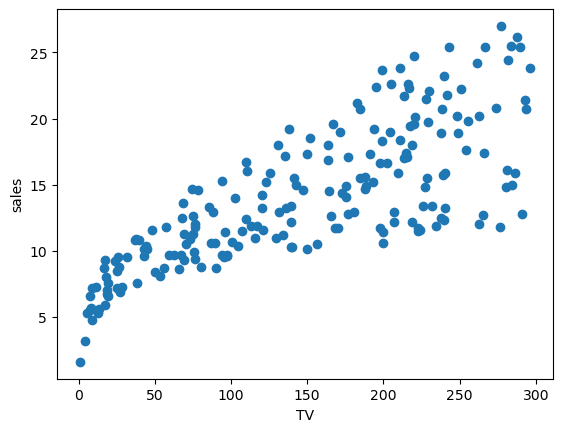

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
x=datos["TV"]
y=datos["sales"] 
plt.scatter(x, y)
plt.xlabel("TV")
plt.ylabel("sales")
plt.show()

In [170]:
l=len(x)
ones=np.ones([l,1])
x_factor=np.reshape(x,[l,1])
X=np.hstack((ones,x_factor)) 
y_vector=np.reshape(y, [l,1])

l,p=X.shape
b=np.random.rand(p) 
def funcion(b, X, y): 
    b=np.reshape(b, [p,1])
    y_pre=X@b
    error=y_pre-y
    rss=error.T@error
    return rss[0, 0]
rss=opt.minimize(funcion, b, args=(X, y_vector))
rss

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 3618.4795490250885
        x: [ 9.312e+00  2.025e-01]
      nit: 5
      jac: [ 0.000e+00  1.404e-03]
 hess_inv: [[ 4.435e-03 -1.485e-04]
            [-1.485e-04  8.863e-06]]
     nfev: 69
     njev: 23

Al resolver el problema analíticamente se encuentra:

$$ \hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x} $$


Compara las estimaciones que encontraste con `minimize` con las que se encuentran con la fórmula dada arriba ($\bar{x}$ y $\bar{y}$ son las medias muestrales).

In [43]:
B=np.sum((x-np.mean(x))*(y-np.mean(y))/np.sum((x-np.mean(x))**2))
B0=np.mean(y)-B*np.mean(x)
B, B0

(0.047536640433019736, 7.0325935491276965)

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión.

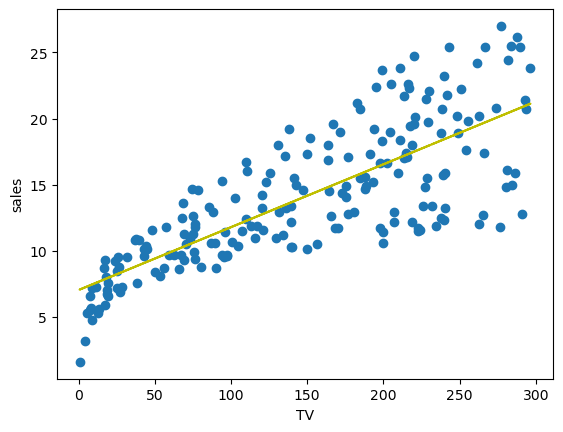

In [64]:
f = 7.033 + 4.754e-02*x

plt.figure()
plt.scatter(x_factor, y) #alpha=.5 se pone eso despues de la y si se deseara que los puntos se vieran un poco más tenues
plt.plot(x_factor, f, c="y")
plt.xlabel("TV")
plt.ylabel("sales")
plt.show() # si no le pongo esto sale un texto arriba a la izquierda de la gráfica

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

Población se refiere a todas las personas que viven en una ciudad, estado, país o incluso sector de la población, todo depende del contexto. Por su parte una muestra se refiere a un pequeño grupo que forma parte de la población, generalmente se usa ese término cuando se habla de las personas que respondieron un estudio.

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

Sería una diferencia unicamente de escala, ya que con una muestra se haría una representación un poco menos exacta que si se realizara con la población entera. 

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-2}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [102]:
Varianza= rss.fun/(n-2)
Varianza

10.618841328948356

In [104]:
Error_Bo=np.sqrt(Var*((1/n)+(np.mean(x)**2)/np.sum((x-np.mean(x))**2)))
Error_Bo

0.4578429402735246

In [110]:
Error_B1=np.sqrt(Var/np.sum((x-np.mean(x))**2))
Error_B1

0.0026906071877971414

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm \text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [112]:
Int_conf_arriba_Bo=Bo-2*(SeBo)
Int_conf_abajo_Bo=Bo+2*(SeBo)

Int_conf_arriba_Bo, Int_conf_abajo_Bo

(6.116907668580647, 7.948279429674746)

In [114]:
Int_conf_arriba_B1=B1-2*(SeB1)
Int_conf_abajo_B1=B1+2*(SeB1)
Int_conf_arriba_B1, Int_conf_abajo_B1

(0.042155426057425456, 0.052917854808614016)

Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

La hipotesis nula es cuando verificamos si para un termino corresponde otro, por ejemplo si para x hay una y. La alternativa es cuando buscas que pase al reves osea que no pase la hipotesis nula, en otras palabras que para y hay un x correspondiente.

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [137]:
mu=0
to=(B0-mu)/SeBo
to

15.360275174116003

In [139]:
t1=(B1-mu)/SeB1
t1

17.667625600873762

La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-2))`

In [145]:
from scipy import stats
pBo=2*(1-stats.t.cdf(np.abs(to), n-2))
pBo

0.0

In [149]:
pB1=2*(1-stats.t.cdf(np.abs(t1), n-2))
pB1

0.0

¿Se rechaza la hipótesis nula? ¿Qué significa?

Si hay una relación entre las variables de x y y, por lo que no se rechaza.

### Verificando la precisión del modelo

Si ya tenemos unos coeficientes de regresión estimados y ya verificamos que la probabilidad de que sí hay relación entre predictor y respuesta es alta. ¿Cómo medimos qué tan bueno es nuestro modelo para predecir?
- RSE (Residual Standard Error)
- $R^2$

#### $R^2$

El RSE se mide con unidades de $Y$, así que no siempre se puede saber cuál es un buen valor. Imagina que tienes un $Y$ con valores entre $-1$ y $1$, y que tienes otro $Y$ con valores entre $1'000,000$ y $100'000,000$. Los errores cuadrados van a ser mucho mayores en el segundo caso que en el primero, pero esto no significa que el modelo creado en el segundo caso sea malo.

El estadístico $R^2$ es una medida de ajuste. Su valor es la proporción de la varianza sí explicada, así que siempre toma valores entre $0$ y $1$. Su fórmula es:

$$ R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}$$
$$ \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$$

TSS mide la varianza total de $Y$. RSS mide la varianza que queda sin explicarse después de la regresión. Entonces TSS-RSS mide la varianza que sí está explicada.

$R^2$ mide la proporción de la varianza en $Y$ que puede ser explicada usando $X$.

Calcula el estadístico $R^2$. ¿Cuánta varianza quedó sin explicar?

In [152]:
TSS=np.sum((y-np.mean(y))**2)
TSS

5417.14875

In [154]:
R2=1-(rss.fun/TSS)
R2

0.6118750508499928

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

## RADIO

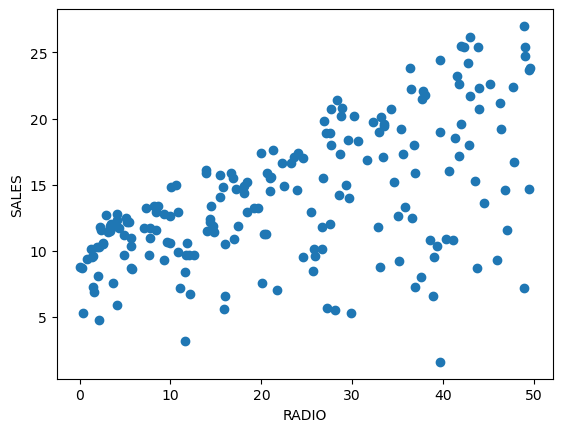

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
x_R=datos["radio"]
y_R=datos["sales"] 
plt.scatter(x_R, y_R)
plt.xlabel("RADIO")
plt.ylabel("SALES")
plt.show()

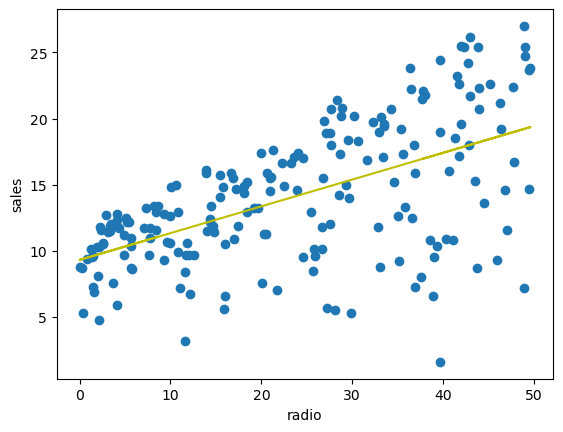

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 3618.479549025088
        x: [ 9.312e+00  2.025e-01]
      nit: 3
      jac: [ 0.000e+00  1.709e-03]
 hess_inv: [[ 9.410e-04 -3.251e-05]
            [-3.251e-05  4.934e-06]]
     nfev: 123
     njev: 37

In [242]:
l=len(x_R)
ones_R=np.ones([l,1])
x_factor_R=np.reshape(x_R,[l,1])
X_R=np.hstack((ones_R,x_factor_R)) 
y_vector_R=np.reshape(y_R, [l,1])

n_R,p_R=X_R.shape 
b_R=np.random.rand(p_R) 

def funcion_R(b_R, X_R, y_R): 
    b_R = np.reshape(b_R, [p_R, 1])
    y_pre_R = X_R @ b_R
    error_R = y_pre_R - y_R
    rss_R = error_R.T @ error_R
    return rss_R[0, 0]

rss_R = opt.minimize(funcion_R, b_R, args=(X_R, y_vector_R))

B1_R = np.sum((x_R - np.mean(x_R)) * (y_R - np.mean(y_R)) / np.sum((x_R - np.mean(x_R))**2))
B0_R = np.mean(y_R) - B1_R * np.mean(x_R)

B1_R, B0_R

f= B0_R + B1_R * x_R

plt.figure()
plt.scatter(x_factor_R, y_R)
plt.plot(x_factor_R, f_R(x_factor_R),c="y")
plt.xlabel("radio")
plt.ylabel("sales")
plt.show()

rss_R

Error estandar de los coeficientes

In [245]:
Varianza_R = rss_R.fun / (n_R - 2)
Varianza_R

18.275149237500443

In [247]:
SeB0_R = np.sqrt(Var_R * ((1/n_R) + (np.mean(x_R)**2) / np.sum((x_R - np.mean(x_R))**2)))
SeB0_R

0.5629004962718711

In [259]:
SeB1_R = np.sqrt(Var_R / np.sum((x_R - np.mean(x_R))**2))
SeB1_R

0.020411306360090635

Intervalos de confianza

In [262]:
Int_conf_arriba_B0_R = B0_R - 2 * SeB0_R
Int_conf_abajo_B0_R = B0_R + 2 * SeB0_R
Int_conf_arriba_B0_R, Int_conf_abajo_B0_R 

(8.185837102614542, 10.437439087702025)

In [264]:
Int_conf_arriba_B1_R = B1_R - 2 * SeB1_R
Int_conf_abajo_B1_R = B1_R + 2 * SeB1_R
Int_conf_arriba_B1_R, Int_conf_abajo_B1_R 

(0.1616731706722584, 0.2433183961126209)

Estadisticos t

In [327]:
mu=0
to_R=(B0_R-mu)/SeBo_R
to_R

16.542245311258217

In [331]:
t1_R=(B1_R-mu)/SeB1_R
t1_R

9.920765472824959

P values

In [274]:
from scipy import stats
p_Bo_R = 2 * (1 - stats.t.cdf(np.abs(to_R), n_R - 2))
p_Bo_R

0.0

In [278]:
p_B1_R = 2 * (1 - stats.t.cdf(np.abs(t1_R), n_R - 2))
p_B1_R


0.0

## NEWSPAPER

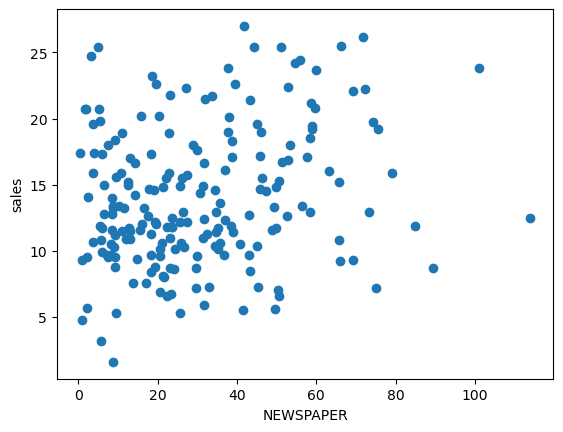

In [291]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
x_NW=datos["newspaper"]
y_NW=datos["sales"] 
plt.scatter(x_NW, y_NW)
plt.xlabel("NEWSPAPER")
plt.ylabel("sales")
plt.show()

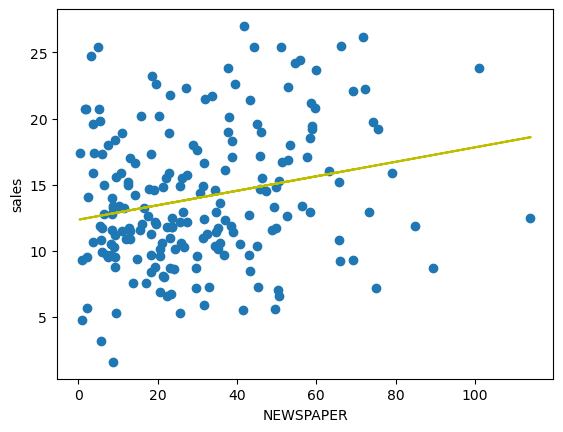

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5134.804544111982
        x: [ 1.235e+01  5.469e-02]
      nit: 5
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 7.445e-03 -1.619e-04]
            [-1.619e-04  5.297e-06]]
     nfev: 21
     njev: 7

In [298]:
l=len(x_NW)
ones_NW=np.ones([l,1])
x_factor_NW=np.reshape(x_NW,[l,1])
X_NW=np.hstack((ones_NW,x_factor_NW)) 
y_vector_NW=np.reshape(y_NW, [l,1])

n_NW,p_NW=X_NW.shape 
b_NW=np.random.rand(p_NW) 

def funcion_NW(b_NW, X_NW, y_NW): 
    b_NW = np.reshape(b_NW, [p_NW, 1])
    y_pre_NW = X_NW @ b_NW
    error_NW = y_pre_NW - y_NW
    rss_NW = error_NW.T @ error_NW
    return rss_NW[0, 0]

rss_NW = opt.minimize(funcion_NW, b_NW, args=(X_NW, y_vector_NW))

B1_NW = np.sum((x_NW - np.mean(x_NW)) * (y_NW - np.mean(y_NW)) / np.sum((x_NW - np.mean(x_NW))**2))
B0_NW = np.mean(y_NW) - B1_NW * np.mean(x_NW)

B1_NW, B0_NW

f_NW= B0_NW + B1_NW * x_NW

plt.figure()
plt.scatter(x_factor_NW, y_NW)
plt.plot(x_factor_NW, f_NW,c="y")
plt.xlabel("NEWSPAPER")
plt.ylabel("sales")
plt.show()

rss_NW

Error estandar de los coeficientes

In [315]:
Varianza_NW = rss_NW.fun / (n_NW - 2)
Varianza_NW

25.93335628339385

In [319]:
SeB0_NW = np.sqrt(Varianza_NW * ((1/n_NW) + (np.mean(x_NW)**2) / np.sum((x_NW - np.mean(x_NW))**2)))
SeB0_NW

0.6214201876094371

In [317]:
SeB1_NW = np.sqrt(Varianza_NW / np.sum((x_NW - np.mean(x_NW))**2))
SeB1_NW

0.01657572187635823

Intervalos de confianza

In [323]:
Int_conf_arriba_B0_NW = B0_NW - 2 * SeB0_NW
Int_conf_abajo_B0_NW = B0_NW + 2 * SeB0_NW
Int_conf_arriba_B0_NW, Int_conf_abajo_B0_NW 

(11.108566694059286, 13.594247444497034)

In [325]:
Int_conf_arriba_B1_NW = B1_NW - 2 * SeB1_NW
Int_conf_abajo_B1_NW = B1_NW + 2 * SeB1_NW
Int_conf_arriba_B1_NW, Int_conf_abajo_B1_NW 

(0.0215416547195569, 0.08784454222498983)

Estadisticos t

In [339]:
mu=0
to_NW=(B0_NW-mu)/SeB0_NW
to_NW

19.876095620248865

In [341]:
t1_NW=(B1_NW-mu)/SeB1_NW
t1_NW

3.2995907436334053

P values

In [345]:
from scipy import stats
p_Bo_NW = 2 * (1 - stats.t.cdf(np.abs(to_NW), n_NW - 2))
p_Bo_NW


0.0

In [349]:
p_B1_NW = 2 * (1 - stats.t.cdf(np.abs(t1_NW), n_NW - 2))
p_B1_NW

0.0011481958688883687

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la función `minimize` para estimar los coeficientes $\beta_0$, $\beta_1$, $\beta_2$ y $\beta_3$

In [353]:
x_TV=datos["TV"]
x_R=datos["radio"]
x_P=datos["newspaper"] 
y=datos["sales"]
l=len(y)
ones=np.ones([l, 1])
x_fac_TV=np.reshape(x_TV, [l,1])
x_fac_R=np.reshape(x_R, [l,1])
x_fac_P=np.reshape(x_P, [l, 1])
X=np.hstack((ones, x_fac_TV, x_fac_R, x_fac_P))
y_vector=np.reshape(y, [l, 1])
l, p=X.shape
b=np.random.rand(p)

def funcion(b, X, y): 
    b=np.reshape(b, [p,1])
    y_pre=X@b
    error=y_pre-y
    rss=error.T@error
    return rss[0, 0]
rss=opt.minimize(funcion, b, args=(X, y_vector))
rss


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 556.8252629024555
        x: [ 2.939e+00  4.576e-02  1.885e-01 -1.038e-03]
      nit: 4
      jac: [ 1.907e-04  8.492e-02  8.392e-03  6.653e-03]
 hess_inv: [[ 1.712e-02 -4.677e-05 -1.963e-04 -1.040e-04]
            [-4.677e-05  3.424e-07 -7.868e-08 -5.748e-08]
            [-1.963e-04 -7.868e-08  1.305e-05 -3.133e-06]
            [-1.040e-04 -5.748e-08 -3.133e-06  6.066e-06]]
     nfev: 221
     njev: 42

Calcula el RSS y RSE.

In [355]:
RSE= np.sqrt(rss.fun/(n-2))
TSS=np.sum((y-np.mean(y))**2)
RSE

1.6769760888389715

In [359]:
R2=1-(rss.fun/TSS)
R2

0.8972106381789026

Dada tu matriz $X$ que contiene todos los factores como columnas, utiliza el siguiente código para encontrar el error estándar de tus estimaciones

`var_beta = np.linalg.inv(X.T @ X) * rse**2`

`std_beta = np.sqrt(var_beta.diagonal())`

El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.

In [361]:
var_beta=np.linalg.inv(X.T@X)*RSE**2
var_beta

array([[ 9.63040535e-02, -2.63043223e-04, -1.10422189e-03,
        -5.85051328e-04],
       [-2.63043223e-04,  1.92608319e-06, -4.42523913e-07,
        -3.23296087e-07],
       [-1.10422189e-03, -4.42523913e-07,  7.34043267e-05,
        -1.76208203e-05],
       [-5.85051328e-04, -3.23296087e-07, -1.76208203e-05,
         3.41205850e-05]])

In [363]:
std_beta=np.sqrt(var_beta.diagonal())
std_beta

array([0.31032894, 0.00138783, 0.00856763, 0.00584128])

Calcula los estadísticos t y *p-values* de tus estimaciones.

In [369]:
T=rss.x/std_beta
T

array([ 9.4702455 , 32.97558321, 22.00491809, -0.17761807])

In [371]:
P0=2*(1-stats.t.cdf(np.abs(T[0]), n-2))
P0

0.0

In [377]:
P1=2*(1-stats.t.cdf(np.abs(T[1]), n-2))
P1

0.0

In [373]:
P2=2*(1-stats.t.cdf(np.abs(T[2]), n-2))
P2

0.0

In [379]:
P3=2*(1-stats.t.cdf(np.abs(T[3]), n-2))
P3

0.8592045110106525

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en regresiones simples? ¿Por qué crees que existen estas diferencias?

En las simples podemos ver como se afecta a partir de una variable, mientras que en las multiples hay que ver como van afecta cada variable. (NO ESTOY MUY SEGURO)

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3